In [1]:
import matplotlib.pyplot as plt
from dictys.net import dynamic_network

#### Utils ####

In [4]:
def load_data(data_file):
    """
    Load the dynamic network data as dictys object and define trajectory branches.
    """
    d0 = dynamic_network.from_file(data_file)
    return d0

def get_tf_indices(dictys_dynamic_object, tf_list):
    """
    Get the indices of transcription factors from a list, if present in ndict and nids[0].
    """
    gene_hashmap = dictys_dynamic_object.ndict
    tf_mappings_to_gene_hashmap = dictys_dynamic_object.nids[0] 
    tf_indices = []  
    gene_indices = []  
    for gene in tf_list:
        # Check if the gene is in the gene_hashmap
        if gene in gene_hashmap:
            gene_index = gene_hashmap[gene]  # Get the index in gene_hashmap
            # Check if the gene index is present in tf_mappings_to_gene_hashmap
            match = np.where(tf_mappings_to_gene_hashmap == gene_index)[0]
            if match.size > 0:  # If a match is found
                tf_indices.append(int(match[0]))  # Append the position of the match
                gene_indices.append(int(gene_index))  # Also append the gene index 
    return tf_indices, gene_indices

def get_pseudotime_of_windows(dictys_dynamic_object, window_indices):
    """
    Get the pseudotime of specific windows for x-axis in plots
    """
    pseudotime_relative_to_bifurcation = dictys_dynamic_object.point['s'].locs  # Access via dictionary keys
    branch_pseudotime = [float(pseudotime_relative_to_bifurcation[idx]) for idx in window_indices]
    return branch_pseudotime

def get_weights_across_windows(dictys_dynamic_object, tf_indices, window_indices):
    """
    Get the non-zero weights of TFs over specific windows for x-axis in plots
    """
    # Access the 3-D array of weights from prop['es']['w_n'] and slice it using np.ix_
    weights_of_tf_target = dictys_dynamic_object.prop['es']['w_n'][np.ix_(tf_indices, range(15767), window_indices)]
    return weights_of_tf_target

def get_indirect_weights_across_windows(dictys_dynamic_object, tf_indices, window_indices):
    """
    Get the indirect weights of TFs over specific windows for x-axis in plots
    """
    indirect_weights_of_tf_target = dictys_dynamic_object.prop['es']['w_in'][np.ix_(tf_indices, range(15767), window_indices)]
    return indirect_weights_of_tf_target

#### Plotting code ####

## Execute the analysis

In [1]:
# Define file paths 
data_file = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/output/dynamic.h5'
output_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/output'
# Define the transcription factors
tf_list = ['IRF4', 'IRF8', 'PRDM1', 'BCL6', 'BATF', 'SPIB']

In [6]:
# Load data
dictys_dynamic_object = load_data(data_file)

#### Export the dynamic network for the PB branch

In [9]:
import os
dictys_dynamic_object.export(os.path.join(output_folder, 'networks'), 0, 1, 16, 1.5, sparsities=None)

#### Plots

In [10]:
# Get the TF indices
tf_indices, gene_indices = get_tf_indices(dictys_dynamic_object, tf_list)
print(f"TF indices: {tf_indices}")
print(f"Gene indices: {gene_indices}")

TF indices: [126, 129, 219, 15]
Gene indices: [6126, 6130, 10330, 1224]


In [12]:
# test pseudotime
# Assign window indices for each branch between 0 to 92
pb_window_indices = list(range(4, 19)) + [1]
abc_window_indices = [0] + list(range(19, 67)) + [2]
gc_window_indices = list(range(67, 93)) + [3]
# Get pseudotime for the window indices
branch_pseudotime = get_pseudotime_of_windows(dictys_dynamic_object, pb_window_indices)
print(f"PB branch pseudotime: {branch_pseudotime}")


PB branch pseudotime: [2.681770768671581e-05, 0.0001637472492527, 0.0003271248261298, 0.0005459519978159, 0.0009290433844578, 0.0013934868059239176, 0.0017674893203456, 0.0021194896982670514, 0.002348737502483, 0.0027161832919031, 0.0028726698639674, 0.0030920662670208, 0.0033093809293067, 0.0036342589521952, 0.0037680133140223, 0.006735218615230201]


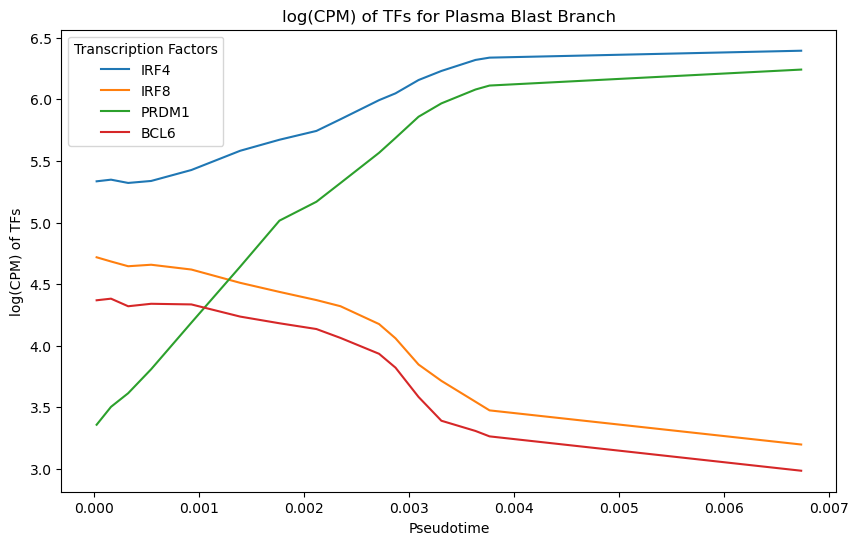

In [13]:
# Get pseudotime for the window indices and plot the CPM
plot_log_cpm_tfs(dictys_dynamic_object, gene_indices, pb_window_indices, tf_list, 'Plasma Blast')


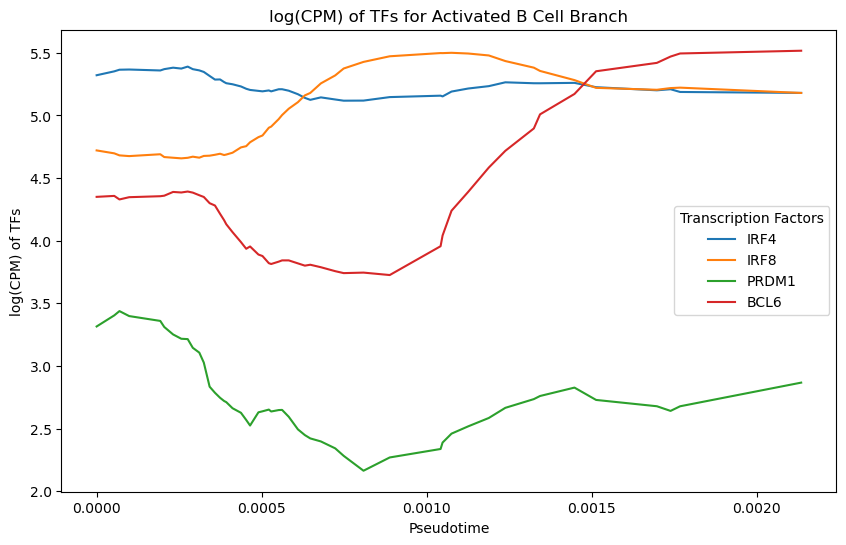

In [14]:
plot_log_cpm_tfs(dictys_dynamic_object, gene_indices, abc_window_indices, tf_list, 'Activated B Cell')

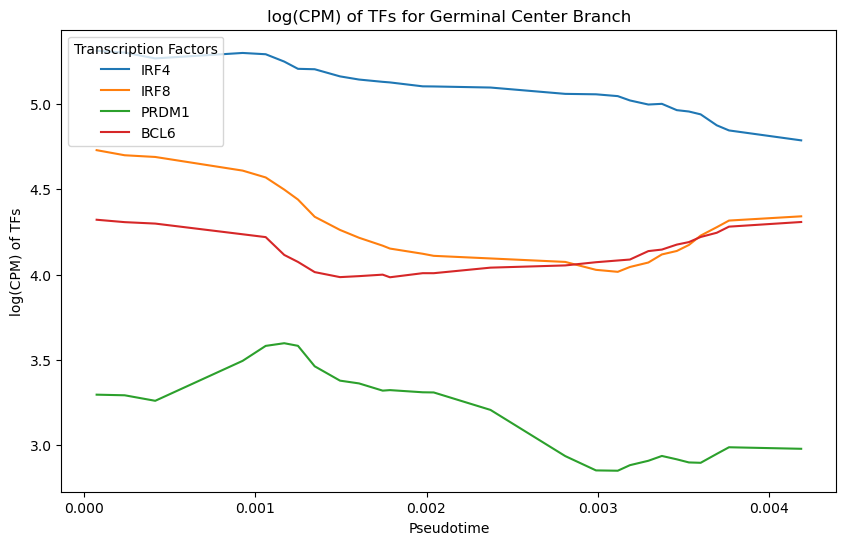

In [15]:
plot_log_cpm_tfs(dictys_dynamic_object, gene_indices, gc_window_indices, tf_list, 'Germinal Center')